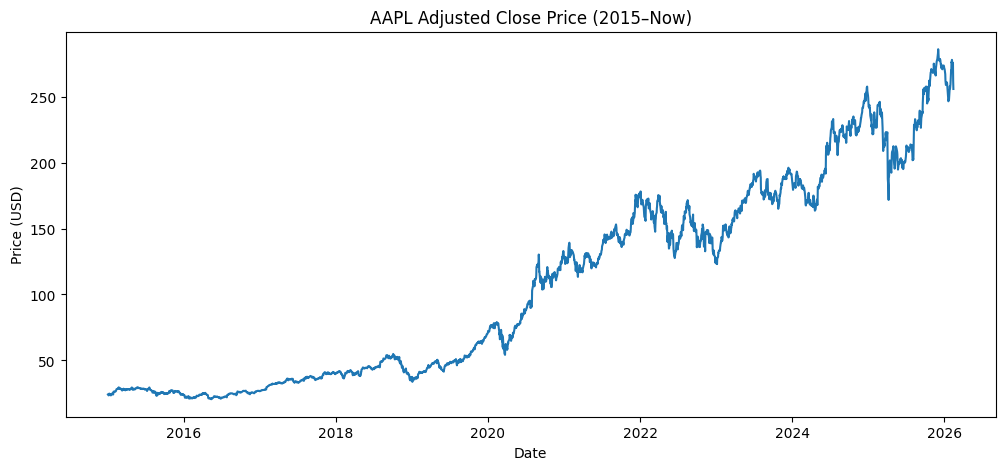

Strategy total return (net of costs): 2.6135
Buy & Hold total return: 9.5629
Number of trades: 64


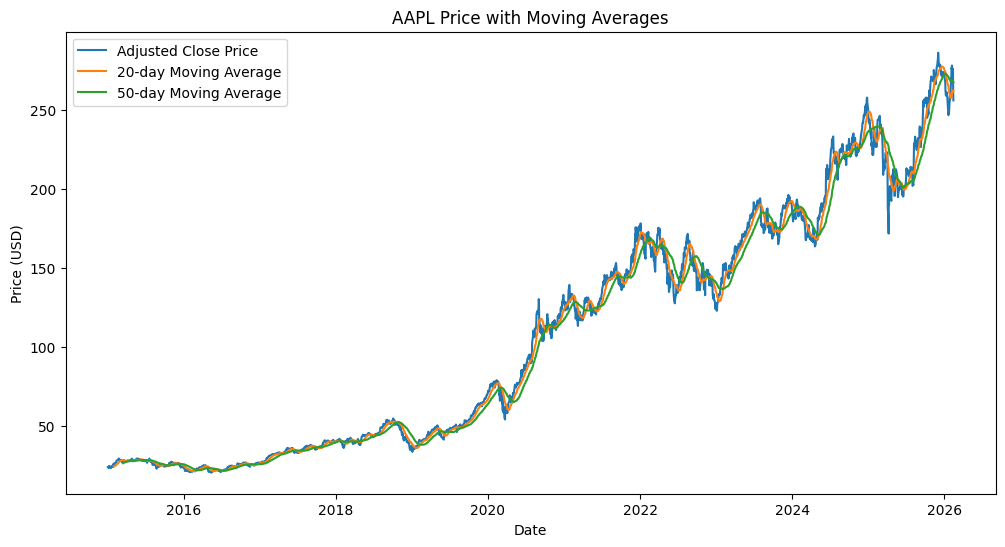

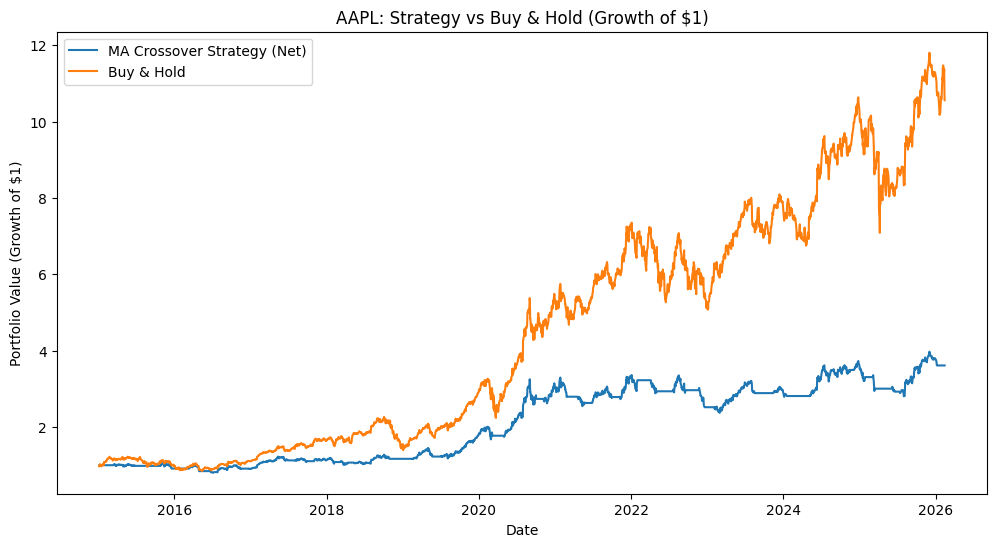

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

ticker = "AAPL"
start_date = "2015-01-01"

df = yf.download(ticker, start=start_date, auto_adjust=True, progress=False)[["Close"]]
df = df.dropna().sort_index()

plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Close"])
plt.title(f"{ticker} Adjusted Close Price (2015–Now)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

df["returns"] = df["Close"].pct_change()

fast_n = 20
slow_n = 50

df["ma_fast"] = df["Close"].rolling(fast_n).mean()
df["ma_slow"] = df["Close"].rolling(slow_n).mean()

df["signal"] = (df["ma_fast"] > df["ma_slow"]).astype(int)

df["position"] = df["signal"].shift(1)

cost_per_trade = 0.0005  

df["strategy_returns_gross"] = df["position"] * df["returns"]

df["trade_event"] = df["position"].diff().abs()

df["cost"] = cost_per_trade * df["trade_event"]

df["strategy_returns"] = df["strategy_returns_gross"] - df["cost"]

df["equity_strategy"] = (1 + df["strategy_returns"]).cumprod()
df["equity_buyhold"] = (1 + df["returns"]).cumprod()

total_return_strategy = df["equity_strategy"].iloc[-1] - 1
total_return_buyhold = df["equity_buyhold"].iloc[-1] - 1

num_trades = df["signal"].diff().abs().sum()

print(f"Strategy total return (net of costs): {total_return_strategy:.4f}")
print(f"Buy & Hold total return: {total_return_buyhold:.4f}")
print(f"Number of trades: {int(num_trades)}")

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Adjusted Close Price")
plt.plot(df.index, df["ma_fast"], label=f"{fast_n}-day Moving Average")
plt.plot(df.index, df["ma_slow"], label=f"{slow_n}-day Moving Average")
plt.title("AAPL Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["equity_strategy"], label="MA Crossover Strategy (Net)")
plt.plot(df.index, df["equity_buyhold"], label="Buy & Hold")
plt.title("AAPL: Strategy vs Buy & Hold (Growth of $1)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (Growth of $1)")
plt.legend()
plt.show()
